In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/deliveries.csv');df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,0,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df1[:4]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/matches.csv');df2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
df2.season.unique() # info about seasons
print('All Seasons:',sorted(df2.season.unique()))

All Seasons: [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


In [ ]:
#total no of matches played between 2008 to 2017 total 10 seasons
# each row represents single match
[row,col]=df2.shape # row and col are assigned to shape of the df2
print('Total matches played:',row)

Total matches played: 636


In [ ]:
#total number of matches by each team
print('Teams: ',df2.team1.unique())
print('No of matches each team played: ',df2.team1.value_counts())

Teams:  ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants']
No of matches each team played:  Mumbai Indians                 82
Kings XI Punjab                77
Chennai Super Kings            77
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Delhi Daredevils               63
Rajasthan Royals               54
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64


In [ ]:
# here to avoid confusion b/w the team name , we will replace rising pune supergiant withrising pune supergiants
#df2["Sector"]=df2['Sector'].replace('Pub','Public')# update the original dataframe
df2['team1'] = df2['team1'].replace('Rising Pune Supergiant','Rising Pune Supergiants');df2
df2['team2'] = df2['team2'].replace('Rising Pune Supergiant','Rising Pune Supergiants');df2
df2.team1.value_counts()
df2.team2.value_counts()


Delhi Daredevils               84
Royal Challengers Bangalore    82
Kolkata Knight Riders          80
Mumbai Indians                 75
Kings XI Punjab                71
Rajasthan Royals               64
Chennai Super Kings            54
Deccan Chargers                32
Sunrisers Hyderabad            30
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiants        15
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

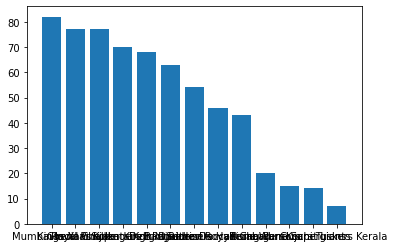

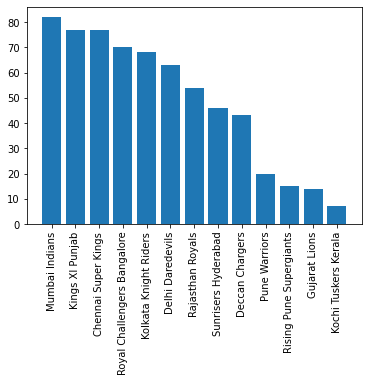

<BarContainer object of 13 artists>

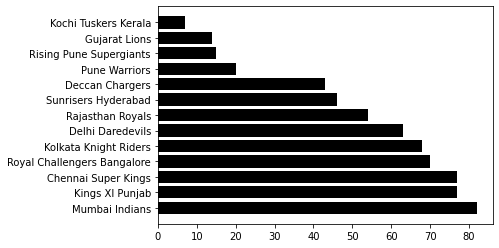

In [ ]:
# team vs no of matches

plt.bar(df2.team1.value_counts().keys(),df2.team1.value_counts())
plt.show()
#with this first plot the x axis names getting overlapped, we can rotate the X axis names (X axis ticks) to avoid overlapping
plt.bar(df2.team1.value_counts().keys(),df2.team1.value_counts())
plt.xticks(rotation=90)# here 90 means 90degree rotation
plt.show()
plt.barh(df2.team1.value_counts().keys(),df2.team1.value_counts(),color='black')# horizontal bar plot

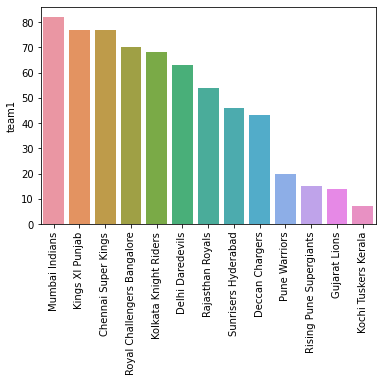

In [ ]:
# seabon lib used for visulisation, provided much appalin visualization with better colours and view, its a built on top of matplotlib
# alternate way we can plot is use seaborn library
sns.barplot(x=df2.team1.value_counts().index,y=df2.team1.value_counts())
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.barplot(y=df2.team1.value_counts().index,x=df2.team1.value_counts(), orientation='horizontal')
plt.show()

AttributeError: ignored

In [ ]:
# no of matches played in each city
df2.city.unique()
df2.city.value_counts()
# top 5 cities which posted most matches
print('top 5 city=','\n',df2.city.value_counts().head())
print('top 5 city=','\n',df2.city.value_counts()[:5])
#print only top 5 city names
print('top 5 city= ','\n',df2.city.value_counts().keys()[:5])

top 5 city= 
 Mumbai       85
Bangalore    66
Kolkata      61
Delhi        60
Hyderabad    49
Name: city, dtype: int64
top 5 city= 
 Mumbai       85
Bangalore    66
Kolkata      61
Delhi        60
Hyderabad    49
Name: city, dtype: int64
top 5 city=  
 Index(['Mumbai', 'Bangalore', 'Kolkata', 'Delhi', 'Hyderabad'], dtype='object')


CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
Name: player_of_match, dtype: int64


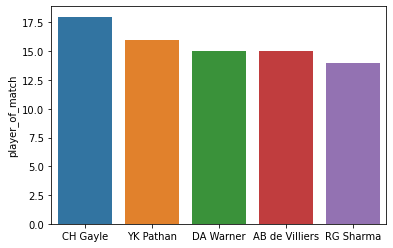

In [ ]:
# top 5 players who won mom award
print(df2.player_of_match.value_counts()[:6])
# plot yhe result
sns.barplot(x=df2.player_of_match.value_counts().keys()[:5],y=df2.player_of_match.value_counts()[:5])
plt.show()

<function matplotlib.pyplot.show>

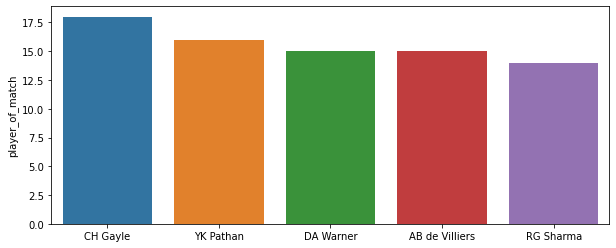

In [ ]:
plt.figure(figsize=(10,4))# width*height=10*6
sns.barplot(x=df2.player_of_match.value_counts().keys()[:5],y=df2.player_of_match.value_counts()[:5])
plt.show

In [ ]:
# total no of matches played, matches having results, no results and tied
print(df2.result.unique())
print()
print(df2.result.value_counts())

['normal' 'tie' 'no result']

normal       626
tie            7
no result      3
Name: result, dtype: int64


In [ ]:
# which team won more matches 
print(df2.winner.value_counts()[:8])

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Name: winner, dtype: int64


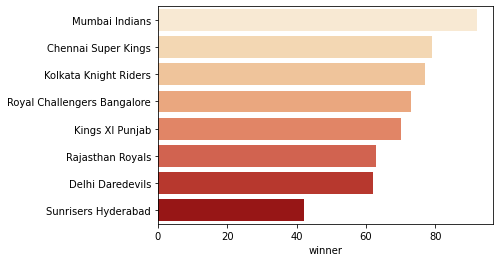

In [ ]:
sns.barplot(y=df2.winner.value_counts().keys()[:8],x=df2.winner.value_counts()[:8], orientation='horizontal',palette='OrRd')# husl,Blues_d,OrRd
plt.show()

In [ ]:
print(df2.toss_winner.value_counts().sort_values(ascending=False)[:8])

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Name: toss_winner, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

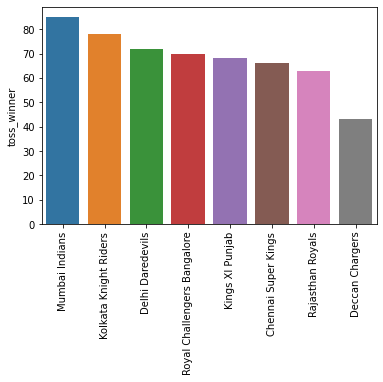

In [ ]:
sns.barplot(y=df2.toss_winner.value_counts().sort_values(ascending=False)[:8],x=df2.toss_winner.value_counts().sort_values(ascending=False).index[:8])
plt.xticks(rotation=90)

M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: venue, dtype: int64


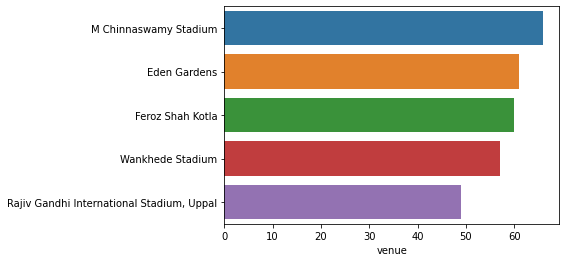

In [ ]:
print(df2.venue.value_counts()[:5])
sns.barplot(x=df2.venue.value_counts()[:5],y=df2.venue.value_counts().index[:5])
#plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

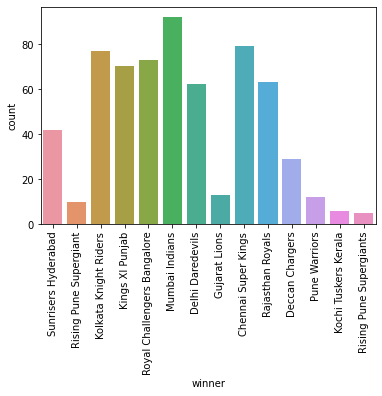

In [ ]:
sns.countplot(df2.winner)
plt.xticks(rotation=90)

In [ ]:
Batted_first=df2[df2.win_by_runs!=0]# relational operator
Batted_first

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,NaN
625,626,2016,Bangalore,2016-05-18,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,NaN
630,631,2016,Kolkata,2016-05-22,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,22,0,YK Pathan,Eden Gardens,KN Ananthapadmanabhan,M Erasmus,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN


In [ ]:
Batted_second=df2[(df2.win_by_runs==0) & (df2.result!='tie')] 
Batted_second

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,629,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
629,630,2016,Kanpur,2016-05-21,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN


In [ ]:
Batted_first.winner.value_counts().sum()

287

In [ ]:
Batted_second.winner.value_counts().sum()

339

In [ ]:
Batted_first.winner.value_counts().sum() + Batted_second.winner.value_counts().sum()

626

In [ ]:
Chasing=Batted_second.winner.value_counts().sum()/(Batted_second.winner.value_counts().sum()+Batted_first.winner.value_counts().sum())

In [ ]:
Batting=Batted_first.winner.value_counts().sum()/(Batted_first.winner.value_counts().sum()+Batted_second.winner.value_counts().sum())

In [ ]:
print('winning stats based on batting first or second:',Chasing*100,Batting*100)

winning stats based on batting first or second: 54.153354632587856 45.846645367412144


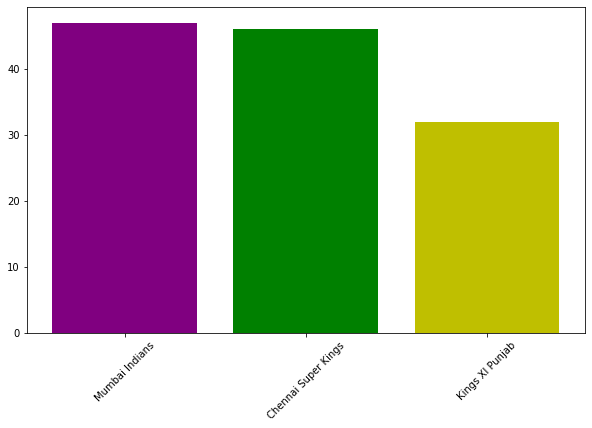

In [ ]:
#plot the win by runs and wickets stats
plt.figure(figsize=(10,6))
plt.bar(Batted_first.winner.value_counts().keys()[:3],Batted_first.winner.value_counts()[:3], color=['purple','g','y'])
plt.xticks(rotation=45)
plt.show()

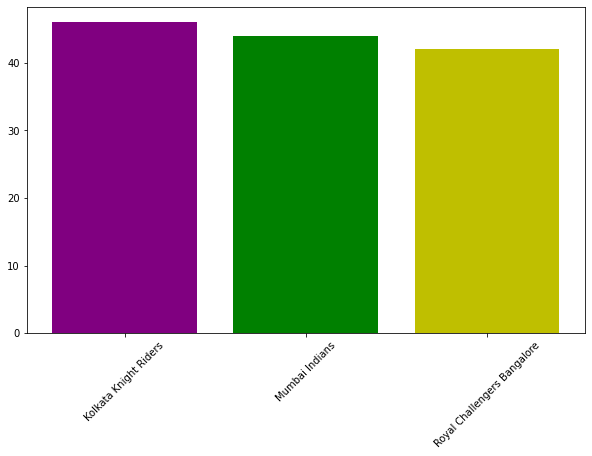

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(Batted_second.winner.value_counts().keys()[:3],Batted_second.winner.value_counts()[:3], color=['purple','g','y'])
plt.xticks(rotation=45)
plt.show()

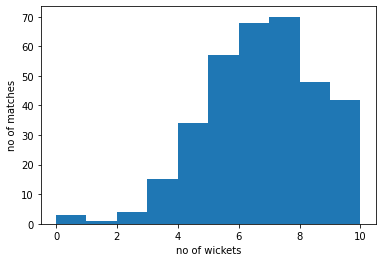

In [ ]:
plt.hist(Batted_second.win_by_wickets)
plt.xlabel('no of wickets')
plt.ylabel('no of matches')
plt.show()

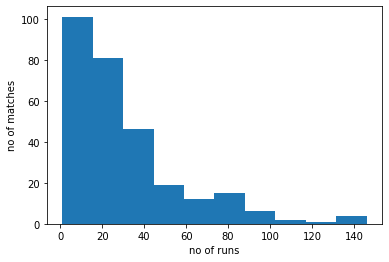

In [ ]:
plt.hist(Batted_first.win_by_runs)
plt.xlabel('no of runs')
plt.ylabel('no of matches')
plt.show()

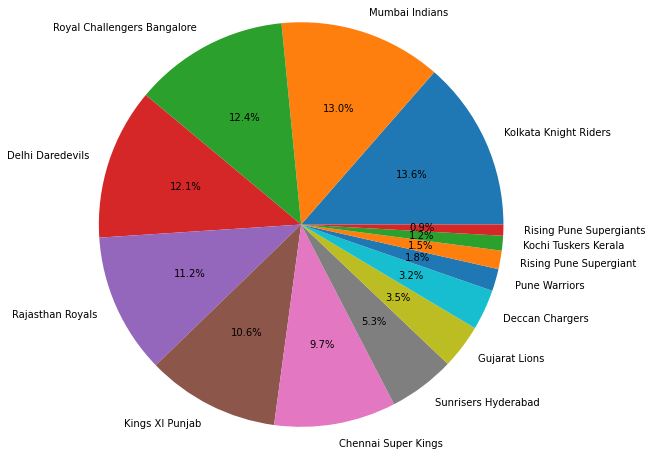

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Batted_second.winner.value_counts(),labels=Batted_second.winner.value_counts().keys(),autopct='%0.1f%%')#pie chart
plt.axis('equal')
plt.show()

In [ ]:
df2.win_by_runs.max()# maximum run by which team has won
print('maximum run by which team has won =',df2)
print(df2.iloc[df2.win_by_runs.sort_values(ascending=False).idxmax()])

maximum run by which team has won =       id  season       city  ...          umpire1          umpire2 umpire3
0      1    2017  Hyderabad  ...      AY Dandekar         NJ Llong     NaN
1      2    2017       Pune  ...   A Nand Kishore           S Ravi     NaN
2      3    2017     Rajkot  ...      Nitin Menon        CK Nandan     NaN
3      4    2017     Indore  ...     AK Chaudhary    C Shamshuddin     NaN
4      5    2017  Bangalore  ...              NaN              NaN     NaN
..   ...     ...        ...  ...              ...              ...     ...
631  632    2016     Raipur  ...   A Nand Kishore     BNJ Oxenford     NaN
632  633    2016  Bangalore  ...     AK Chaudhary  HDPK Dharmasena     NaN
633  634    2016      Delhi  ...        M Erasmus    C Shamshuddin     NaN
634  635    2016      Delhi  ...        M Erasmus        CK Nandan     NaN
635  636    2016  Bangalore  ...  HDPK Dharmasena     BNJ Oxenford     NaN

[636 rows x 18 columns]
id                               44
sea

In [ ]:
print(df2.iloc[df2.win_by_wickets.sort_values(ascending=False).idxmax()])

id                                         184
season                                    2010
city                                 Bangalore
date                                2010-03-18
team1                         Rajasthan Royals
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                  0
win_by_wickets                              10
player_of_match                      JH Kallis
venue                    M Chinnaswamy Stadium
umpire1                            K Hariharan
umpire2                              DJ Harper
umpire3                                    NaN
Name: 183, dtype: object


In [ ]:
df2[df2.win_by_wickets==df2.win_by_wickets.max()].head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
df2[df2.win_by_runs==df2.win_by_runs.max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [ ]:
df2[df2.toss_winner==df2.winner]# teams which won by the toss and also won match
print(df2[df2.toss_winner==df2.winner].winner.count())

325


# some more options on seaborn 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data = pd.read_csv('https://raw.githubusercontent.com/Abeyaantrix2Internship/intern/main/matches.csv'); Data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


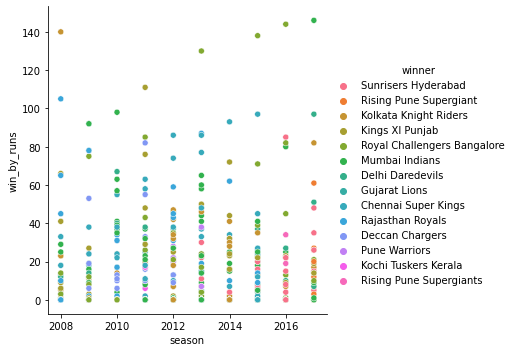

In [ ]:
sns.relplot(x='season',y='win_by_runs',hue='winner',data=Data)

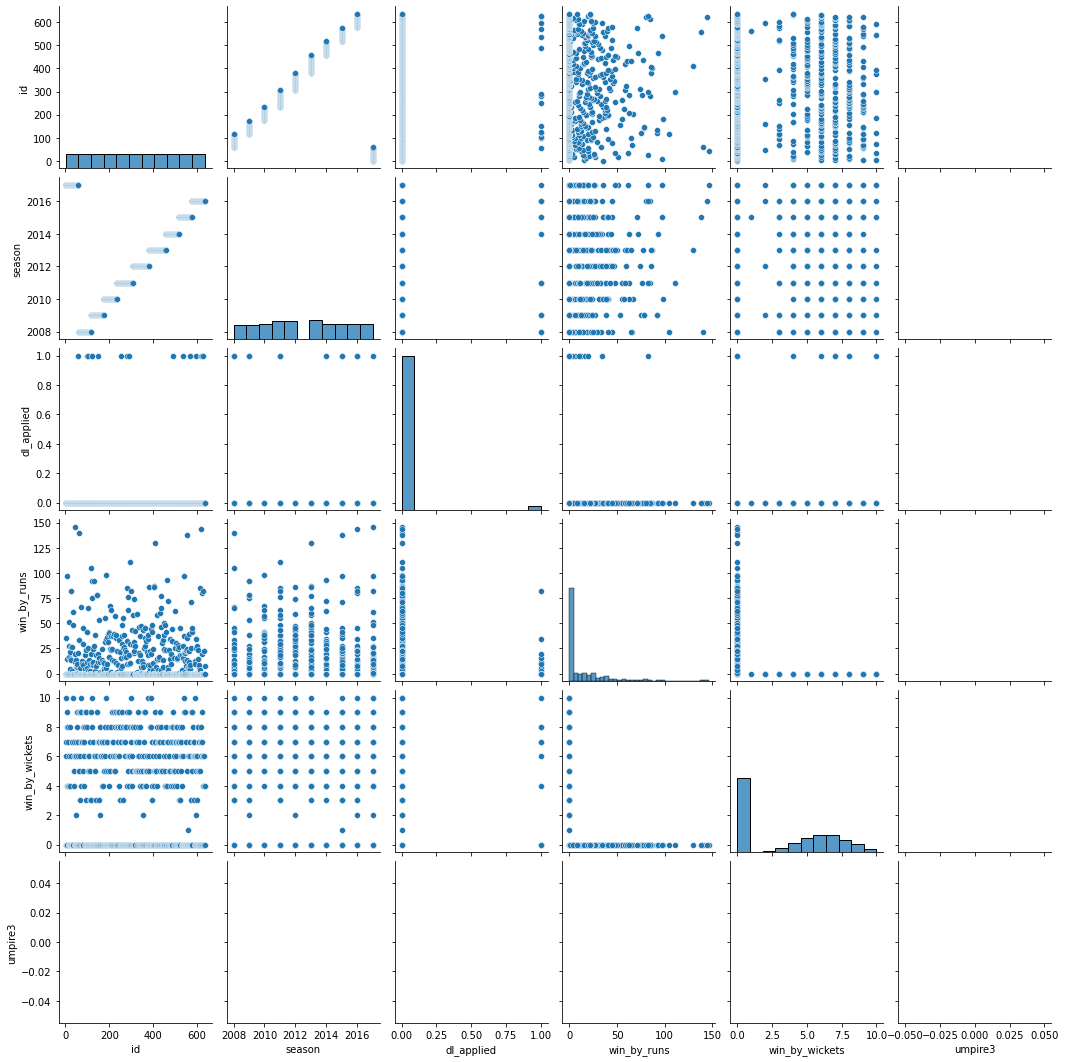

In [ ]:
sns.pairplot(Data)

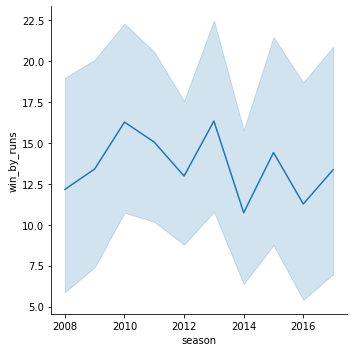

In [ ]:
sns.relplot(x='season',y='win_by_runs',kind='line',data=Data)

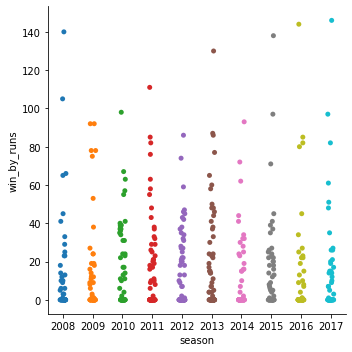

In [ ]:
sns.catplot(x='season',y='win_by_runs', data=Data)

In [ ]:
a= ['1','3','4']
##b=[21,23,43]
#print(a>b)
for A in a:
  print(2*A)

11
33
44


In [ ]:
a= np.array([[1,2],[3,4]])
b= np.array([[5,6],[7,8]])
print(a*b)

[[ 5 12]
 [21 32]]


In [ ]:
a= np.arange(0,10,2)
print(a)

[0 2 4 6 8]


In [ ]:
print(np.array([[1,2,3],[4,5,6]]).sum(axis=1))

[ 6 15]


In [ ]:
a= np.array([1,2,3])
b= np.append(a,[4,5,6])
print(b,len(b))

[1 2 3 4 5 6] 6


In [ ]:
df1= pd.DataFrame({'A': [1,2,3,4]})
df2= pd.DataFrame({'B': [5,6,7,8]})
df3=pd.concat((df1,df2))
print(df3.shape)

(8, 2)


In [ ]:
for i in range (5):
  pass
print(i)

4


In [ ]:
a= [7,7,2,3,4,9,8]
b=a[:3]
print(b)
print(a.sorted())

[7, 7, 2]


AttributeError: ignored

In [ ]:
a='5'
res= a*3
print(res
      )

In [ ]:
n= 'SIKANDAR'
print(set(n))
print(len(n))


In [ ]:
a,b=0,1
while b<10:
  print(b,end='');a,b=b,a+b

In [ ]:
a= 17/2*3+2
a

In [ ]:
x=5
def func():
  print('in function x =',x)
if __name__ =='__main__':
  x=10
  func()

In [ ]:
n= 'sikandar'
n.upper()
print(n)

In [ ]:
x= 17/2%2*3**3
x

In [ ]:
x= 'abcdef'
i='i'
while i in x:
  print(i,end="")

In [ ]:
x='abcd'
for i in range(len(x)):
  x[i].upper()
print(x)

abcd


In [ ]:
class Student :
 def __init__ (self):
  print('sikander',end="")
obj1=Student()
obj2=obj1

sikander

In [ ]:
class Student :
  regno=1
  name='sikander'
  marks=98
obj1=Student()

In [ ]:
7^10

In [ ]:
a,b= 1,0
a= a^b
b=a^b
a=a^b
print(a)

In [ ]:
x= 'abcdef'
i='a'
while i in x[:-1]:
  print(i,end='')


In [ ]:
print('hello{0!r} and {0!s}'.format('foo','bin'))

In [ ]:
sc= {'kar': 'bang','Tn':'chenni'}
print(sc['mah'])

In [ ]:
import numpy as np
q=np.array([[1,2],[3,4],[5,6]])

b= q[(q>3)&(q>11)]
print(b)

[]


In [ ]:
x='abcdef'
i='a'
while i in x[:-1]:


SyntaxError: ignored

In [ ]:
a,b=1,0
a=a^b
b=a^b
a=a^b
print(a)

0


In [ ]:
7^10


13

In [ ]:
print('hello{0!r} and {0!s}'.format("foo","bin"))

hello'foo' and foo


In [3]:
n= np.arange(0,10,2)
print(n)

[0 2 4 6 8]


In [6]:
e= np.eye(4)
print(e)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [20]:
n= np.array([23,21,18,25,12,18,10])
print(np.sort(n))
np.median(n)

[10 12 18 18 21 23 25]


18.0

In [21]:
n= np.array([23,45,32,20,26])
print(np.sort(n))
np.median(n)

[20 23 26 32 45]


26.0

In [10]:
a= [12,32,45]
b=[21,23,43]
print(a>b)

False


In [12]:
na= np.array([[1,2],[3,4]])
nb= np.array([[5,6],[7,8]])
nc= np.hstack((na,nb))
print(nc,nc.shape)

[[1 2 5 6]
 [3 4 7 8]] (2, 4)
